In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import mysql.connector

con = mysql.connector.connect(user='hbs-student', password='super-secure-password?',
                              host='hbs-ds-060120.c1doesqrid0e.us-east-1.rds.amazonaws.com',
                              database='movies')
cur = con.cursor()

# Q5. who are the best actors/directors etc by revenue

In [3]:
query_names="""SELECT DISTINCT
    n.nconst,
    primary_name,
    primary_profession,
    primary_title,
    start_year
FROM
    imdb_title_principals p
        JOIN
    imdb_title_basics t USING (tconst)
        JOIN
    imdb_name_basics n USING (nconst)"""
df_names = pd.read_sql_query(query_names,con)
df_names.head()


,nconst,primary_name,primary_profession,primary_title,start_year
0,nm0000002,Lauren Bacall,"actress,soundtrack",Cameraman: The Life and Work of Jack Cardiff,2010
1,nm0000002,Lauren Bacall,"actress,soundtrack",Diana Vreeland: The Eye Has to Travel,2011
2,nm0000002,Lauren Bacall,"actress,soundtrack",The Forger,2012
3,nm0000002,Lauren Bacall,"actress,soundtrack",Wide Blue Yonder,2010
4,nm0000003,Brigitte Bardot,"actress,soundtrack,producer",1960,2010


In [4]:
df_names.shape

(1027204, 5)

In [5]:
df_names.to_csv('names_movies')

In [8]:
df_names=pd.read_csv('names_movies')
df_names.head()
df_joint_rev = pd.read_csv('joined_revenue')

In [7]:
df_names_rev = df_names.merge(df_joint_rev, how='inner', left_on =['primary_title','start_year'], right_on=['movie_title','release_year'])

In [13]:
df_names_rev.shape

(22784, 12)

In [14]:
df_names_rev.to_csv('df_names_rev')

In [3]:
df_names_rev = pd.read_csv('df_names_rev')

In [4]:
df_names_rev.head()

,Unnamed: 0,Unnamed: 0_x,nconst,primary_name,primary_profession,primary_title,start_year,Unnamed: 0_y,movie_title,production_budget,domestic_gross,worldwide_gross,release_year
0,0,13,nm0000006,Ingrid Bergman,"actress,soundtrack,producer",Ingrid Bergman: In Her Own Words,2015,5412,Ingrid Bergman: In Her Own Words,NaN,138000.0,138000.0,2015.0
1,1,17688,nm0006219,Michael Nyman,"composer,music_department,soundtrack",Ingrid Bergman: In Her Own Words,2015,5412,Ingrid Bergman: In Her Own Words,NaN,138000.0,138000.0,2015.0
2,2,37268,nm0084983,Stig Björkman,"director,writer,miscellaneous",Ingrid Bergman: In Her Own Words,2015,5412,Ingrid Bergman: In Her Own Words,NaN,138000.0,138000.0,2015.0
3,3,60056,nm0197061,Eva Dahlgren,"soundtrack,actress,composer",Ingrid Bergman: In Her Own Words,2015,5412,Ingrid Bergman: In Her Own Words,NaN,138000.0,138000.0,2015.0
4,4,60948,nm0202220,Dominika Daubenbüchel,"editor,writer",Ingrid Bergman: In Her Own Words,2015,5412,Ingrid Bergman: In Her Own Words,NaN,138000.0,138000.0,2015.0


In [8]:
df_names_rev_skinny = df_names_rev.drop(['Unnamed: 0', 'Unnamed: 0_x', 'primary_title','start_year','Unnamed: 0_y','movie_title','production_budget','domestic_gross','release_year'], axis=1)
v.head()

,nconst,primary_name,primary_profession,worldwide_gross
0,nm0000006,Ingrid Bergman,"actress,soundtrack,producer",138000.0
1,nm0006219,Michael Nyman,"composer,music_department,soundtrack",138000.0
2,nm0084983,Stig Björkman,"director,writer,miscellaneous",138000.0
3,nm0197061,Eva Dahlgren,"soundtrack,actress,composer",138000.0
4,nm0202220,Dominika Daubenbüchel,"editor,writer",138000.0


In [13]:
df_names_rev_grouped = df_names_rev_skinny.groupby(['nconst','primary_name', 'primary_profession']).sum().sort_values(by=['worldwide_gross'], ascending = False)

In [14]:
df_names_rev_grouped

,,,worldwide_gross
nconst,primary_name,primary_profession,
nm0498278,Stan Lee,"producer,writer,actor",1.118786e+10
nm0456158,Jack Kirby,"writer,animation_department,miscellaneous",9.285562e+09
nm0000375,Robert Downey Jr.,"actor,producer,soundtrack",8.361736e+09
nm0425005,Dwayne Johnson,"actor,producer,soundtrack",6.470420e+09
nm0270559,Kevin Feige,"producer,miscellaneous,production_manager",6.441697e+09
...,...,...,...
nm0841790,Eric Swanson,"composer,music_department,sound_department",0.000000e+00
nm4946291,Jaimie Steck,actress,0.000000e+00
nm0840594,Junichi Suzuki,"director,writer,producer",0.000000e+00


In [17]:
df_names_rev_grouped.to_csv('rev_by_name')

In [3]:
df_names_rev_grouped=pd.read_csv('rev_by_name')

In [12]:
top_100_names = df_names_rev_grouped.nlargest(100,'worldwide_gross')

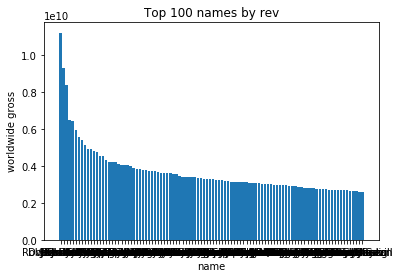

In [13]:
plt.bar(top_100_names['primary_name'],top_100_names['worldwide_gross'])
plt.title('Top 100 names by rev')
plt.xlabel('name')
plt.ylabel('worldwide gross')
plt.show()
#see gian step down at ~6*10^9

In [10]:
top_5_names = df_names_rev_grouped.nlargest(5,'worldwide_gross')
top_5_names
#keep everything above 6*10^9

,nconst,primary_name,primary_profession,worldwide_gross
0,nm0498278,Stan Lee,"producer,writer,actor",1.118786e+10
1,nm0456158,Jack Kirby,"writer,animation_department,miscellaneous",9.285562e+09
2,nm0000375,Robert Downey Jr.,"actor,producer,soundtrack",8.361736e+09
3,nm0425005,Dwayne Johnson,"actor,producer,soundtrack",6.470420e+09
4,nm0270559,Kevin Feige,"producer,miscellaneous,production_manager",6.441697e+09


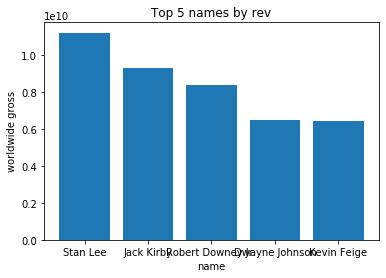

In [14]:
plt.bar(top_5_names['primary_name'],top_5_names['worldwide_gross'])
plt.title('Top 5 names by rev')
plt.xlabel('name')
plt.ylabel('worldwide gross')
plt.show()

# Q6: Is there any trend in titles and the types of movies that are high grossing?

In [9]:
df_joint_rev.sort_values(by=['worldwide_gross'],ascending = False)

,Unnamed: 0,movie_title,production_budget,domestic_gross,worldwide_gross,release_year
110,110,Avatar,425000000.0,760507625.0,2.776345e+09,2009.0
2717,2717,Titanic,200000000.0,659363944.0,2.208208e+09,1997.0
1391,1391,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015.0
7854,7886,Marvel's The Avengers,NaN,623400000.0,1.518900e+09,2012.0
3954,3954,The Avengers,225000000.0,623279547.0,1.517936e+09,2012.0
...,...,...,...,...,...,...
800,800,The Rise of the Krays,2500000.0,0.0,0.000000e+00,2016.0
4309,4309,Sunday School Musical,250000.0,0.0,0.000000e+00,2008.0
3627,3627,Small Apartments,2000000.0,0.0,0.000000e+00,2013.0
427,427,The Secret,3500000.0,0.0,0.000000e+00,2006.0


In [9]:
df_joint_rev_1000_largest=df_joint_rev.nlargest(1000,'worldwide_gross')


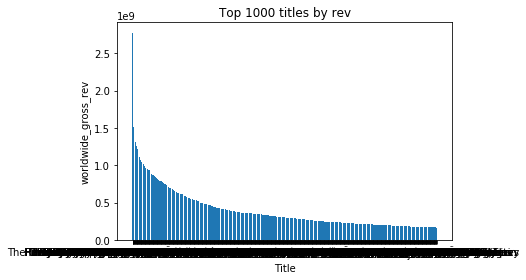

In [10]:
plt.bar(df_joint_rev_1000_largest['movie_title'],df_joint_rev_1000_largest['worldwide_gross'])
plt.title('Top 1000 titles by rev')
plt.xlabel('Title')
plt.ylabel('worldwide_gross_rev')
plt.show()

In [16]:
#pick anything over a billion
df_joint_rev_50_largest=df_joint_rev.nlargest(50,'worldwide_gross')
df_joint_rev_50_largest

,Unnamed: 0,movie_title,production_budget,domestic_gross,worldwide_gross,release_year
110,110,Avatar,425000000.0,760507625.0,2.776345e+09,2009.0
2708,2708,Titanic,200000000.0,659363944.0,2.208208e+09,1997.0
1389,1389,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015.0
7886,7886,Marvel's The Avengers,NaN,623400000.0,1.518900e+09,2012.0
3956,3956,The Avengers,225000000.0,623279547.0,1.517936e+09,2012.0
7880,7880,Avengers: Age of Ultron,330600000.0,459000000.0,1.405400e+09,2015.0
7889,7889,Black Panther,200000000.0,700100000.0,1.347000e+09,2018.0
520,520,Harry Potter and the Deathly Hallows: Part II,125000000.0,381193157.0,1.341693e+09,2011.0
7868,7868,Harry Potter and the Deathly Hallows Part 2,NaN,381000000.0,1.341500e+09,2011.0
7885,7885,Star Wars: The Last Jedi,NaN,620200000.0,1.332600e+09,2017.0


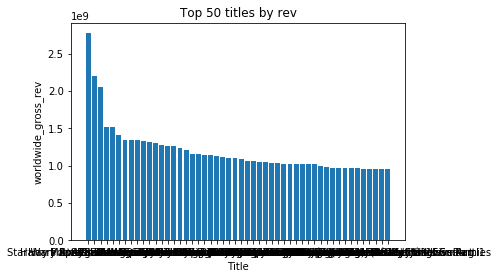

In [17]:
plt.bar(df_joint_rev_50_largest['movie_title'],df_joint_rev_50_largest['worldwide_gross'])
plt.title('Top 50 titles by rev')
plt.xlabel('Title')
plt.ylabel('worldwide_gross_rev')
plt.show()

In [18]:
#asign movie based off of
movie_title_list = list(df_joint_rev_50_largest['movie_title'])
movie_title_list

['Avatar',
 'Titanic',
 'Star Wars Ep. VII: The Force Awakens',
 "Marvel's The Avengers",
 'The Avengers',
 'Avengers: Age of Ultron',
 'Black Panther',
 'Harry Potter and the Deathly Hallows: Part II',
 'Harry Potter and the Deathly Hallows Part 2',
 'Star Wars: The Last Jedi',
 'Star Wars Ep. VIII: The Last Jedi',
 'Jurassic World: Fallen Kingdom',
 'Frozen',
 'Beauty and the Beast (2017)',
 'Beauty and the Beast',
 'Incredibles 2',
 'Iron Man 3',
 'Minions',
 'Captain America: Civil War',
 'Aquaman',
 'The Lord of the Rings: The Return of the King',
 'Transformers: Dark of the Moon',
 'Captain Marvel',
 'Skyfall',
 'Transformers: Age of Extinction',
 'The Dark Knight Rises',
 'Toy Story 3',
 'Pirates of the Caribbean: Dead Manâ??s Chest',
 'Rogue One: A Star Wars Story',
 'Pirates of the Caribbean: On Stranger Tides',
 'Jurassic Park',
 'Despicable Me 3',
 'Finding Dory',
 'Star Wars Ep. I: The Phantom Menace',
 'Alice in Wonderland (2010)',
 'Alice in Wonderland',
 'Zootopia',
 'Th

In [19]:
movie_descr = ['Avatar',
'Titanic',
'Star Wars',
'Marvel',
'Marvel',
'Marvel',
'Marvel',
'Harry Potter',
'Harry Potter',
'Star Wars',
'Star Wars',
'Jurassic Park',
'Disney Animation ',
'Disney Animation ',
'Disney Animation ',
'Disney Animation ',
'Marvel',
'Universal Animation',
'Marvel',
'DC comics',
'Lord of the Rings',
'Marvel',
'Marvel',
'James Bond',
'Marvel',
'DC comics',
'Disney Animation ',
'Pirates of the Carribbean',
'Star Wars',
'Pirates of the Carribbean',
'Jurassic Park',
'Universal Animation',
'Disney Animation ',
'Star Wars',
'Disney Animation ',
'Disney Animation ',
'Disney Animation ',
'Lord of the Rings',
'DC comics',
'Disney Animation ',
'Harry Potter',
'Universal Animation',
'Disney Animation ',
'Pirates of the Carribbean',
'Disney Animation ',
'Jumanji',
'Harry Potter',
'Harry Potter',
'Lord of the Rings',
'Lord of the Rings']


In [26]:
d_top50_title_descr={'movie_title_list':movie_title_list,'movie_descr':movie_descr}

In [22]:
df_top50_title_descr=pd.DataFrame(data=d_top50_title_descr)

In [23]:
df_top50_title_descr.head()

,movie_title_list,movie_descr
0,Avatar,Avatar
1,Titanic,Titanic
2,Star Wars Ep. VII: The Force Awakens,Star Wars
3,Marvel's The Avengers,Marvel
4,The Avengers,Marvel


In [27]:
df_rev_top_50_cat = df_joint_rev_50_largest.merge(df_top50_title_descr, how='inner',left_on=['movie_title'], right_on=['movie_title_list'])
df_rev_top_50_cat.head()

,Unnamed: 0,movie_title,production_budget,domestic_gross,worldwide_gross,release_year,movie_title_list,movie_descr
0,110,Avatar,425000000.0,760507625.0,2.776345e+09,2009.0,Avatar,Avatar
1,2708,Titanic,200000000.0,659363944.0,2.208208e+09,1997.0,Titanic,Titanic
2,1389,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015.0,Star Wars Ep. VII: The Force Awakens,Star Wars
3,7886,Marvel's The Avengers,NaN,623400000.0,1.518900e+09,2012.0,Marvel's The Avengers,Marvel
4,3956,The Avengers,225000000.0,623279547.0,1.517936e+09,2012.0,The Avengers,Marvel


In [28]:
df_rev_top_50_cat_skinny = df_rev_top_50_cat.drop(['Unnamed: 0', 'movie_title','production_budget','domestic_gross','release_year','movie_title_list'], axis=1)
df_rev_top_50_cat_skinny.head()

,worldwide_gross,movie_descr
0,2.776345e+09,Avatar
1,2.208208e+09,Titanic
2,2.053311e+09,Star Wars
3,1.518900e+09,Marvel
4,1.517936e+09,Marvel


In [53]:
df_top_50_cat_grouped = df_rev_top_50_cat_skinny.groupby(['movie_descr']).sum().sort_values(by=['worldwide_gross'], ascending = False)

In [54]:
df_top_50_cat_grouped = df_top_50_cat_grouped.reset_index()

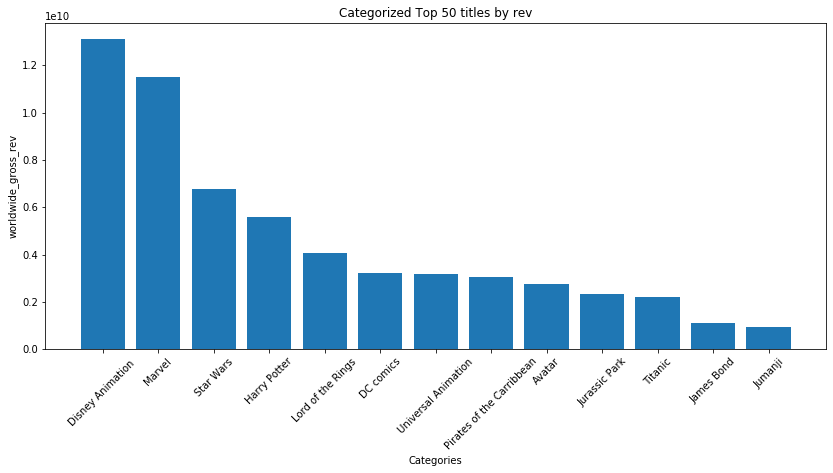

In [58]:
fig = plt.figure(figsize=(14,6))
ax = plt.subplot()
ax.bar(df_top_50_cat_grouped['movie_descr'],df_top_50_cat_grouped['worldwide_gross'])
ax.set_title('Categorized Top 50 titles by rev')
ax.set_ylabel('worldwide_gross_rev')
ax.set_xlabel('Categories')
plt.xticks(rotation=45)
plt.show()


Q6 are there a set of actors that are highest revenue generating?